In [34]:
# url: https://www.datascience.com/blog/k-means-clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
data = pd.read_csv('driver_fleet_data.csv', sep='\t')

 we'll only be looking at two driver features: mean distance driven per day and the mean percentage of time a driver was >5 mph over the speed limit

The chart below shows the dataset for 4,000 drivers

In [36]:
data.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [37]:
distance_X = data.iloc[:, 1]
speed_Y = data.iloc[:, 2]

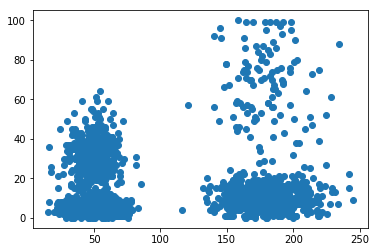

In [38]:
plt.scatter(distance_X, speed_Y)

In [41]:
from sklearn.cluster import KMeans

f1 = data['Distance_Feature'].values
f2 = data['Speeding_Feature'].values

X=np.matrix(list(zip(f1,f2)))

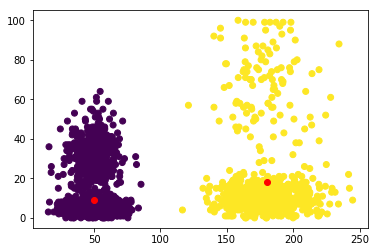

In [46]:
kmeans = KMeans(n_clusters=2).fit(X)

color_Y = kmeans.predict(X)
plt.scatter(distance_X, speed_Y, c=color_Y)

#merkezleri cizer
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red');

In [18]:
centers

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

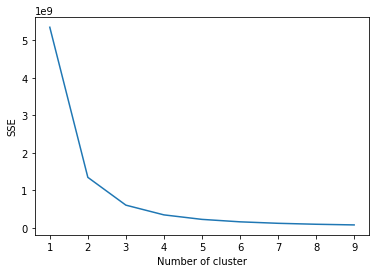

{1: 5345517626.129628, 2: 1345510565.8539705, 3: 604783438.0643508, 4: 345536814.77855086, 5: 225547562.7840607, 6: 160335970.6115988, 7: 121028264.77122104, 8: 95576360.5810978, 9: 78031891.07506424}


In [45]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
print(sse)

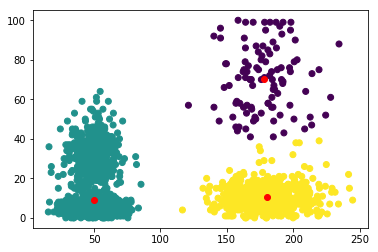

In [47]:
kmeans = KMeans(n_clusters=3).fit(X)

color_Y = kmeans.predict(X)
plt.scatter(distance_X, speed_Y, c=color_Y)

#merkezleri cizer
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red');